In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Use 3 decimal places in output display
pd.set_option("display.precision", 3)

# Don't wrap repr(DataFrame) across additional lines
pd.set_option("display.expand_frame_repr", False)

# Set max rows displayed in output to 25
pd.set_option("display.max_rows", 25)

In [2]:
!python3 --version


Python 3.7.6


In [3]:
# Importing the csv file into a pandas dataframe

os.chdir("/home/edu/Public/sharkAttacks")
os.getcwd()

df = pd.read_csv("input/GSAF5.csv", encoding = "ISO-8859-1")

# Saving a copy of the original df in order to not have to re-read the csv if we want to undo a change.
dfBackup = df

# Let's get an idea of how the dataframe looks like.
display(df.head())


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


# Initial cleaning

In [4]:
# Examining the size of the dataframe: 24 columns, 5992 rows/entries
display(df.columns)
display(df.shape)

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

(5992, 24)

In [5]:
# We can check the types of variables we are dealing with
# We can see that there are multiple columns where the type of data does not match the variable type
# Age is not an int, Fatal is not a bolean, so this is something we can clean up.

df.dtypes

Case Number               object
Date                      object
Year                       int64
Type                      object
Country                   object
Area                      object
Location                  object
Activity                  object
Name                      object
Sex                       object
Age                       object
Injury                    object
Fatal (Y/N)               object
Time                      object
Species                   object
Investigator or Source    object
pdf                       object
href formula              object
href                      object
Case Number.1             object
Case Number.2             object
original order             int64
Unnamed: 22               object
Unnamed: 23               object
dtype: object

In [6]:
# Checking the amount of nulls in the whole dataframe

for col, numnulls in df.isnull().sum().items():
    if numnulls > 0:
        print(f"{col} {numnulls}")

Country 43
Area 402
Location 496
Activity 527
Name 200
Sex  567
Age 2681
Injury 27
Fatal (Y/N) 19
Time 3213
Species  2934
Investigator or Source 15
href formula 1
href 3
Unnamed: 22 5991
Unnamed: 23 5990


In [7]:
# I noticed two columns without a label and a high number of null values: 
# "Unnamed: 22" and "Unnamed: 23". We can see if they contain any values.

un22 = df["Unnamed: 22"]
display(df["Unnamed: 22"].head(10))
display(df[un22.notnull()])

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
Name: Unnamed: 22, dtype: object

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
1247,2006.06.18,18-Jun-06,2006,Unprovoked,BRAZIL,Pernambuco,"Punta Del Chifre Beach, Olinda",Body boarding,Humberto Pessoa Batista,M,...,NaN,globalsurfnews.com,2006.06.18-Batista.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.06.18,2006.06.18,4746,stopped here,NaN


In [8]:
un23 = df["Unnamed: 23"]
display(df["Unnamed: 23"].head(10))
display(df[un23.notnull()])

# Neither column seems to contain data that can be used.

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
Name: Unnamed: 23, dtype: object

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
4182,1952.07.13,13-Jul-52,1952,Provoked,USA,California,"San Diego, San Diego County",Fishing,"Gerald Howard, on board sportsfishing boat Ter...",M,...,NaN,"L.A. Times, 7/14/1952",1952.07.13-Howard.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1952.07.13,1952.07.13,1811,NaN,Teramo
5585,1879.03.10,10-Mar-1879,1879,Invalid,AUSTRALIA,New South Wales,Near Sydney,The steamship Bonnie Dundee lost in collision,Cabin boy of the Bonnie Dundee,M,...,NaN,"Star, 3/22/1879",1879.03.10-Bonnie-Dundee.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1879.03.10,1879.03.10,408,NaN,change filename


In [9]:
# We can drop them instead.

df2 = df # Backup in case
df3 = df2.drop("Unnamed: 22", axis = 1) 
df3.head()
df4 = df3.drop(columns = "Unnamed: 23") # Different syntax with same functionality
df4.head()

# Now that we have verified that we removed the correct columns, 
# we overwrite the df we are working with with our changes.
df = df4


In [10]:
# Data cleaning: there seems to be two columns with links to pdfs with details of each incident. 
# If we were interested in removing one of them, we could check whether the content is the same between them.

# We can see try to eyeball a couple of rows like this.
print(df["href formula"][0])
print(df["href"][0])
df["href formula"][0] == df["href"][0]

# But it would be better to make a counter that checks how often there is
# a discrepancy between the two columns as follows:

discr = 0
for i in range(len(df["href formula"])):
    if not df["href formula"][i] == df["href"][i]:
        discr += 1
        # The following is commented out for readibility, remove the comment to see the 54 mismatches
        #print(df["href formula"][i], "|||||", df["href"][i]) 


http://sharkattackfile.net/spreadsheets/pdf_directory/2016.09.18.c-NSB.pdf
http://sharkattackfile.net/spreadsheets/pdf_directory/2016.09.18.c-NSB.pdf


In [11]:
print("Total mismatches",discr)

Total mismatches 54


## Group by country

An obvious line of analysis would be to look at shark incidents per country, continent or region. To do that, we can first try to get the amount of shark attacks in each country.

In [177]:
countryCnt = df.groupby('Country')['Country']
countryCnt.count()

pd.set_option('display.max_rows', 6000) # Enable this in order to be able to see all rows
# pd.set_option('display.max_columns', 500)

pd.set_option('display.max_row', 25) # We reset it after for readibility

# After the groupby, we can sort the values in descending order, and only show the top 20 country in order to get the country-counts that show up most frequently in the dataset.

top20countries = countryCnt.size().sort_values(ascending = False).head(20)
top20countries

Country
USA                 2116
AUSTRALIA           1279
SOUTH AFRICA         565
PAPUA NEW GUINEA     133
NEW ZEALAND          125
BRAZIL               102
BAHAMAS               98
MEXICO                81
ITALY                 71
FIJI                  62
PHILIPPINES           59
REUNION               57
NEW CALEDONIA         51
MOZAMBIQUE            44
CUBA                  42
SPAIN                 40
INDIA                 37
EGYPT                 36
CROATIA               34
PANAMA                32
Name: Country, dtype: int64

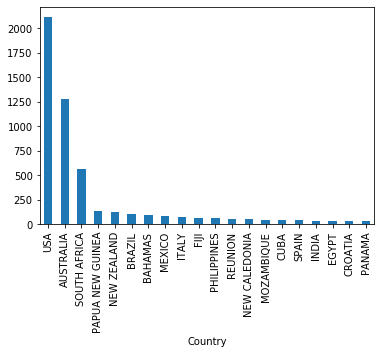

In [14]:
# We can get a simple graphical output of the countries with most reports
display(top20countries.plot.bar())

An interesting question would be to see if shark attacks correlate with population. We expect more populous countries to have more shark attacks.
To do this, we import a table with countries and population we found online.

In [68]:
# Attempt one: had some troubles with the columns on this one
dfCountryP = pd.read_csv("input/populationPerCountry.csv", sep = '\t')
#display(dfCountryP.head())
#dfCountryP.columns

In [64]:
# Attempt 2: instead we use a dataset that comes in a csv, and that we can edit more easily
dfCP = pd.read_csv("input/populationPerCountry2.csv")

dfCP

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,"Population, total",SP.POP.TOTL,5.421e+04,5.544e+04,5.622e+04,5.670e+04,5.703e+04,5.736e+04,...,1.017e+05,1.020e+05,1.026e+05,1.032e+05,1.038e+05,1.043e+05,1.049e+05,1.054e+05,1.058e+05,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8.997e+06,9.169e+06,9.351e+06,9.543e+06,9.745e+06,9.956e+06,...,2.919e+07,3.012e+07,3.116e+07,3.227e+07,3.337e+07,3.441e+07,3.538e+07,3.630e+07,3.717e+07,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5.455e+06,5.531e+06,5.609e+06,5.679e+06,5.735e+06,5.771e+06,...,2.336e+07,2.422e+07,2.511e+07,2.602e+07,2.694e+07,2.788e+07,2.884e+07,2.982e+07,3.081e+07,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1.609e+06,1.660e+06,1.711e+06,1.763e+06,1.814e+06,1.865e+06,...,2.913e+06,2.905e+06,2.900e+06,2.895e+06,2.889e+06,2.881e+06,2.876e+06,2.873e+06,2.866e+06,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,1.341e+04,1.438e+04,1.537e+04,1.641e+04,1.747e+04,1.855e+04,...,8.445e+04,8.375e+04,8.243e+04,8.077e+04,7.921e+04,7.801e+04,7.730e+04,7.700e+04,7.701e+04,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,9.470e+05,9.660e+05,9.940e+05,1.022e+06,1.050e+06,1.078e+06,...,1.776e+06,1.791e+06,1.805e+06,1.824e+06,1.822e+06,1.802e+06,1.816e+06,1.831e+06,1.845e+06,NaN
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5.315e+06,5.393e+06,5.474e+06,5.557e+06,5.642e+06,5.728e+06,...,2.315e+07,2.381e+07,2.447e+07,2.515e+07,2.582e+07,2.650e+07,2.717e+07,2.783e+07,2.850e+07,NaN
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,1.710e+07,1.752e+07,1.797e+07,1.842e+07,1.890e+07,1.938e+07,...,5.122e+07,5.200e+07,5.283e+07,5.369e+07,5.455e+07,5.539e+07,5.620e+07,5.700e+07,5.778e+07,NaN
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3.071e+06,3.164e+06,3.261e+06,3.360e+06,3.463e+06,3.570e+06,...,1.361e+07,1.402e+07,1.447e+07,1.493e+07,1.540e+07,1.588e+07,1.636e+07,1.685e+07,1.735e+07,NaN


For now, we are only interested in country name and population. We can make a dataframe with just that data.  
For ease of use, let us only use 2018 data for population. We can consider stratifying by year later on.

In [36]:
dfCP.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype='object')

In [222]:
dfC2018 = dfCP[['Country Name','2018']] # We select the data only from 2018, along with the country names.
dfC2018 = dfC2018.rename(columns = {'Country Name':'Country', '2018':'population'}) # We give 2018 a more descriptive name, and we rename 'Country name' to 'Country' to match the shark data.
dfC2018

# We can check how often country names match between the shark df and the country df

sum(e for e in df['Country'] if e in dfC2018['Country'])

0

There are no matches between the tables. This is likely because the way countries are written in our shark dataframe table does not match our new table with populationdata.

In [75]:
# Trying to join the two does not yield something very useful for that reason:

dfJoined = pd.merge(df, dfC2018, on = 'Country')
dfJoined # Our new dataframe now has a column with population, but the df is only 5 rows long -  these were the only ones that matched. 

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,population
0,2016.03.10,10-Mar-16,2016,Unprovoked,Fiji,Vanua Levu,NaN,Diving for beche-de-mer,Maika Tabua,M,...,Afternoon,NaN,"Fiji Sun, 3/12/2016",2016.03.10-Tabua.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.03.10,2016.03.10,5910,8.835e+05
1,1988.02.02,02-Feb-88,1988,Unprovoked,Fiji,Vanua Levu,NaN,Diving,Qalo Moceyawa,M,...,NaN,"Tiger shark, 3 m","Sun, 2/5/1988, p.15",1988.02.02-Fiji-Moceyawa.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1988.02.02,1988.02.02,3468,8.835e+05
2,1872.01.28,28-Jan-1872,1872,Invalid,Fiji,Lomaiviti Provine,"Levuka Point, Ovalau Island",boat capsized,Mr. Manning,M,...,dusk,NaN,"Empire, 2/20/1872",1872.01.28-Manning.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1872.01.28,1872.01.28,348,8.835e+05
3,2006.03.28.R,Reported 28-Mar-2006,2006,Unprovoked,Sierra Leone,Western Area,"Lumely Beach, Freetown",Fishing,4 fishermen,M,...,NaN,"3 m, 600-kg shark",Reuters,2006.03.28.R-SierraLeone.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.03.28.R,2006.03.28.R,4724,7.650e+06
4,2005.08.01,01-Aug-05,2005,Invalid,Seychelles,Inner Islands,Off North Island,Fishing,Rolly Lesperance,M,...,NaN,Bull shark,D. Rowat,2005.08.01-Lesperance.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2005.08.01,2005.08.01,4654,9.676e+04


In [88]:
display(df['Country'].head(10))
dfC2018['Country'].count()

# The clearest difference is that country names are written in all caps in our shark data, and normally capitalized in our country dataset.

0              USA
1              USA
2              USA
3        AUSTRALIA
4        AUSTRALIA
5        AUSTRALIA
6              USA
7              USA
8    NEW CALEDONIA
9              USA
Name: Country, dtype: object

264

In [98]:
# In addition, there is a difference in how the 'USA' is called in the two tables - which we change here.

dfC2018['Country'].str.find('United States') #This confirms how the United states is written in this dataframe

dfC2018 = dfC2018.replace('United States', 'USA')


In [99]:
# We change the country names in the country data to all caps to match the shark data
uppercase = lambda str: str.upper()
uppercase("usa")

'USA'

In [104]:
dfC2018['Country'].apply(uppercase) # We confirm that it works

dfC2018['Country'] = dfC2018['Country'].apply(uppercase) # So we create a new table with uppercase country names

dfC2018

,Country,population
0,ARUBA,1.058e+05
1,AFGHANISTAN,3.717e+07
2,ANGOLA,3.081e+07
3,ALBANIA,2.866e+06
4,ANDORRA,7.701e+04
...,...,...
259,KOSOVO,1.845e+06
260,"YEMEN, REP.",2.850e+07
261,SOUTH AFRICA,5.778e+07
262,ZAMBIA,1.735e+07


In [106]:
# Now we can try to join the two dataframes again:
dfJoined = pd.merge(df, dfC2018, on = 'Country')
display(dfJoined)



,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,population
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,13h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,3.272e+08
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,11h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,3.272e+08
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,10h43,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,3.272e+08
3,2016.09.11,11-Sep-16,2016,Unprovoked,USA,Florida,"Ponte Vedra, St. Johns County",Wading,male,M,...,15h15,3' to 4' shark,"News4Jax, 9/11/2016",2016.09.11-PonteVedra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.11,2016.09.11,5987,3.272e+08
4,2016.09.07,07-Sep-16,2016,Unprovoked,USA,Hawaii,"Makaha, Oahu",Swimming,female,F,...,14h30,"Tiger shark, 10?","Hawaii News Now, 9/7/2016",2016.09.07-Oahu.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.07,2016.09.07,5986,3.272e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5418,1826.11.00,Ca. Nov-1826,1826,Unprovoked,GHANA,Cape Coast,NaN,Bathing,a seaman from HM Redwing,M,...,NaN,NaN,"Sydney Gazette and New South Wales Advertiser,...",1826.11.00-seaman-Redwing.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1826.11.00,1826.11.00,179,2.977e+07
5419,1776.00.00.b,1776,1776,Boat,GREENLAND,NaN,NaN,NaN,Occupants of skin boats,NaN,...,NaN,White sharks,T. Pennant,1776.00.00-Greenland.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1776.00.00.b,1776.00.00.b,154,5.602e+04
5420,1755.00.00,1755,1755,Unprovoked,SWEDEN,Skagerrak arm of the North Sea,Bohuslän,NaN,Fishermen,M,...,NaN,NaN,"C. Moore, GSAF",1755.00.00-Sweden.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1755.00.00,1755.00.00,148,1.018e+07
5421,1733.00.00,1733,1733,Invalid,ICELAND,Bardestrand,Talkknefiord,NaN,NaN,NaN,...,NaN,NaN,E. Olafsen,1733.00.00-Iceland.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1733.00.00,1733.00.00,144,3.536e+05


We have more success this time: 5423 rows match the data. 90% of the rows!

In [114]:
print("Joined DF:",dfJoined.shape)
print("Original DF:",df.shape)
print("Proportion matched:", dfJoined.shape[0]/df.shape[0])

Joined DF: (5423, 23)
Original DF: (5992, 22)
Proportion matched: 0.9050400534045394


In [140]:
# We get the list of top countries again

countryCnt = dfJoined.groupby(['Country','population'],as_index=False)['Country']
topcountries = countryCnt.size().sort_values(ascending = False)
topcountries

Country           population
USA               3.272e+08     2116
AUSTRALIA         2.499e+07     1279
SOUTH AFRICA      5.778e+07      565
PAPUA NEW GUINEA  8.606e+06      133
NEW ZEALAND       4.886e+06      125
                                ... 
GREENLAND         5.602e+04        1
GHANA             2.977e+07        1
GEORGIA           3.731e+06        1
GABON             2.119e+06        1
ALGERIA           4.223e+07        1
Length: 104, dtype: int64

We group by country and population (which have the same value), and add the count of shark attacks per country, for which we can use any column.

In [174]:
dfByCountry = dfJoined.groupby(['Country','population'],as_index=False).count()[['Country', 'population', 'Year']]
dfByCountry = dfByCountry.rename(columns = {'Year':'numberatt'})
dfByCountry = dfByCountry.sort_values(by = 'numberatt', ascending = False)
dfByCountry.head(10)

,Country,population,numberatt
101,USA,3.272e+08,2116
5,AUSTRALIA,2.499e+07,1279
87,SOUTH AFRICA,5.778e+07,565
73,PAPUA NEW GUINEA,8.606e+06,133
66,NEW ZEALAND,4.886e+06,125
10,BRAZIL,2.095e+08,102
60,MEXICO,1.262e+08,81
46,ITALY,6.043e+07,71
25,FIJI,8.835e+05,62
75,PHILIPPINES,1.067e+08,59


We can now add a calculated column to the dataframe of shark attacks per capita, and limit the results to the 20 countries with the greatest populations. 

In [198]:
dfByCountry['attPerCapita'] = dfByCountry['numberatt'] / dfByCountry['population']
top20 = dfByCountry.sort_values(by = 'numberatt', ascending = False).head(20)
top20

,Country,population,numberatt,attPerCapita
101,USA,3.272e+08,2116,6.468e-06
5,AUSTRALIA,2.499e+07,1279,5.118e-05
87,SOUTH AFRICA,5.778e+07,565,9.779e-06
73,PAPUA NEW GUINEA,8.606e+06,133,1.545e-05
66,NEW ZEALAND,4.886e+06,125,2.559e-05
10,BRAZIL,2.095e+08,102,4.869e-07
60,MEXICO,1.262e+08,81,6.419e-07
46,ITALY,6.043e+07,71,1.175e-06
25,FIJI,8.835e+05,62,7.018e-05
75,PHILIPPINES,1.067e+08,59,5.532e-07


## Results: shark attacks per capita

With this data, we can look at whether countries with a high absolute number of shark attacks, are also the countries with a high number of shark attacks per capita. As you can see below, this is not the case. Countries with a high number of attacks, such as the United States, Australia and South Africa, do not lead the pack when it comes to 'shark attacks per capita'. 


Shark attacks per capita


Total number of shark attacks


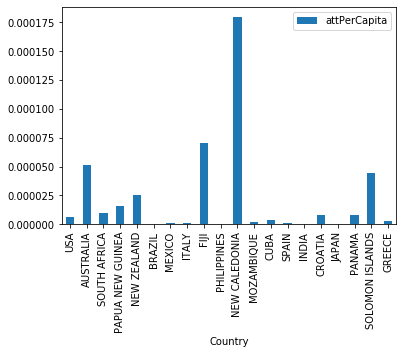

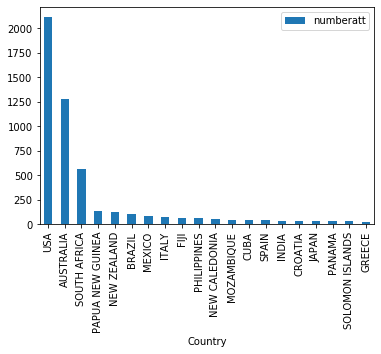

In [213]:
display(top20[['Country', 'attPerCapita']].plot.bar(x = 'Country'))
display(top20[['Country', 'numberatt']].plot.bar(x = 'Country'))





We can reorder the data to get the 20 countries with the highest amount of shark attacks per capita instead.

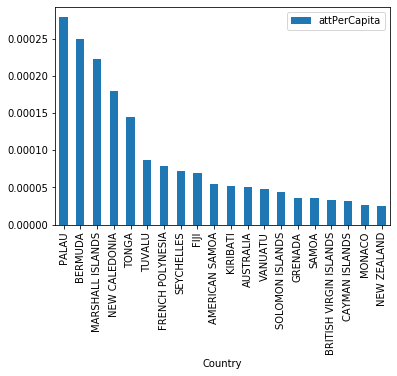

In [207]:
top20AttPC = dfByCountry.sort_values(by = 'attPerCapita', ascending = False).head(20)
display(top20AttPC[['Country', 'attPerCapita']].plot.bar(x = 'Country'))

Here we see that it is especially island nations that have a high index of 'attacks per capita'.   
We may choose to remove countries from this ranking with a very small number of shark attacks, a division by population if the amount of attacks is 1 is not as useful.  
Let's take a look at the number of attacks, and the attacks per capita side by side

In [219]:
dfByCountry.sort_values(by = 'attPerCapita', ascending = False).head(20)

,Country,population,numberatt,attPerCapita
71,PALAU,1.791e+04,5,2.792e-04
9,BERMUDA,6.397e+04,16,2.501e-04
58,MARSHALL ISLANDS,5.841e+04,13,2.226e-04
65,NEW CALEDONIA,2.841e+05,51,1.795e-04
94,TONGA,1.032e+05,15,1.454e-04
97,TUVALU,1.151e+04,1,8.690e-05
27,FRENCH POLYNESIA,2.777e+05,22,7.923e-05
81,SEYCHELLES,9.676e+04,7,7.234e-05
25,FIJI,8.835e+05,62,7.018e-05
1,AMERICAN SAMOA,5.546e+04,3,5.409e-05


There are indeed a number of countries with only one or a few attacks. We can filter these out.

In [218]:
smallN = dfByCountry['numberatt'] >= 5

dfByCountry[smallN].sort_values(by = 'attPerCapita', ascending = False).head(20)

,Country,population,numberatt,attPerCapita
71,PALAU,1.791e+04,5,2.792e-04
9,BERMUDA,6.397e+04,16,2.501e-04
58,MARSHALL ISLANDS,5.841e+04,13,2.226e-04
65,NEW CALEDONIA,2.841e+05,51,1.795e-04
94,TONGA,1.032e+05,15,1.454e-04
27,FRENCH POLYNESIA,2.777e+05,22,7.923e-05
81,SEYCHELLES,9.676e+04,7,7.234e-05
25,FIJI,8.835e+05,62,7.018e-05
50,KIRIBATI,1.158e+05,6,5.179e-05
5,AUSTRALIA,2.499e+07,1279,5.118e-05


Which gives us a final list, with the countries witht the highest number of attacks per capita, where at least 5 attacks occured.

### More plots
We can also plot the different variables against each other to try and see if there is an association.  
Here: attacks per capita plotted against number of attacks. It does not seem like there is an association between attacks per capita and number of attacks.

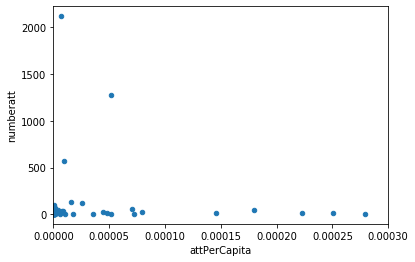

In [246]:
#fig, ax = plt.subplots()
#print(type(ax))
dfByCountry[smallN].plot.scatter(x = 'attPerCapita', y = 'numberatt', xlim = (0, 0.0003))

We also don't see a clear association an association between population and number of attacks.

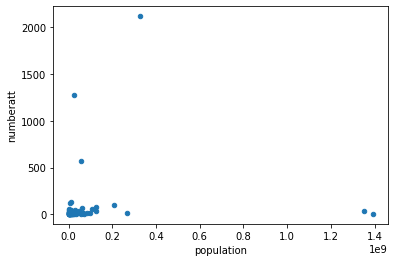

In [251]:
dfByCountry[smallN].plot.scatter(x = 'population', y = 'numberatt')

# Fatality of attacks

The next question we may have is what proportion of attacks are fatal.   
We can take a look at the kinds of values of find in the 'Fatal (Y/N)' column.

In [253]:

df['Fatal (Y/N)'].head(30)
print(df['Fatal (Y/N)'].describe())

count     5973
unique       8
top          N
freq      4315
Name: Fatal (Y/N), dtype: object


In [270]:
# Although the column-name says Y/N, there are 8 unique values. We list these as follows:

df['Fatal (Y/N)'].unique()

array([False, True, nan], dtype=object)

This gives us a list of the values we can possible expect, which makes it easy to create a function that transforms these values into bools



In [269]:
def ynToBool(v):
    if v in ['Y']: return True
    elif v in ['N',' N', 'N ','n']: return False
    return np.NaN

df['Fatal (Y/N)'].apply(ynToBool).unique() # We verify that the function turned all values in the array into Bools and Null values.
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].apply(ynToBool) # We overwrite the original column with our new values.

In [285]:
# We then group by the column we just adjusted
df.groupby('Fatal (Y/N)').count()['Date']

Fatal (Y/N)
False    4325
True     1552
Name: Date, dtype: int64

In [295]:
fatal = 'Fatal (Y/N)'
totalLetality = sum(df[fatal] == True) / (sum(df[fatal] == False) + sum(df[fatal] == True))
print('Overall lethality:', totalLetality)

Overall lethality: 0.26408031308490726


#### Conclusion: 26% of all shark attacks in our database resulted in a fatality.

In [320]:
# Combining the earlier data, and the new transformation of this data into a new dataframe:
df2 = dfJoined.merge(dfByCountry[['Country','attPerCapita']], on = 'Country')


df2[fatal] = df['Fatal (Y/N)']

#display(df[fatal])
#display(df2[fatal])

# We have changed the order and removed rows
sum(1 for e in range(len(df[fatal])) if df[fatal][e] != df[fatal][e])




115

In [301]:
type(dfByCountry)

pandas.core.frame.DataFrame